In [12]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

data = tf.keras.datasets.fashion_mnist
(training_images, training_labels),(test_images, test_labels) = data.load_data()

training_images = training_images / 255.0
test_images = test_images / 255.0

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128,activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5)



Epoch 1/5
1875/1875 [==============================] - 1s 526us/step - loss: 0.5000 - accuracy: 0.8240
Epoch 2/5
1875/1875 [==============================] - 1s 541us/step - loss: 0.3760 - accuracy: 0.8634
Epoch 3/5
1875/1875 [==============================] - 1s 551us/step - loss: 0.3361 - accuracy: 0.8775
Epoch 4/5
1875/1875 [==============================] - 1s 518us/step - loss: 0.3080 - accuracy: 0.8878
Epoch 5/5
1875/1875 [==============================] - 1s 511us/step - loss: 0.2939 - accuracy: 0.8915


313/313 [==============================] - 0s 275us/step
Epoch 1/5
1500/1500 [==============================] - 1s 620us/step - loss: 0.0598 - accuracy: 0.9779 - val_loss: 0.6020 - val_accuracy: 0.8895
Epoch 2/5
1500/1500 [==============================] - 1s 636us/step - loss: 0.0630 - accuracy: 0.9766 - val_loss: 0.5571 - val_accuracy: 0.8931
Epoch 3/5
1500/1500 [==============================] - 1s 622us/step - loss: 0.0592 - accuracy: 0.9787 - val_loss: 0.5787 - val_accuracy: 0.8916
Epoch 4/5
1500/1500 [==============================] - 1s 604us/step - loss: 0.0607 - accuracy: 0.9777 - val_loss: 0.5598 - val_accuracy: 0.8943
Epoch 5/5
1500/1500 [==============================] - 1s 598us/step - loss: 0.0594 - accuracy: 0.9782 - val_loss: 0.5991 - val_accuracy: 0.8947
{'verbose': 1, 'epochs': 5, 'steps': 1500}
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
1/1 [==============================] - 0s 9ms/step


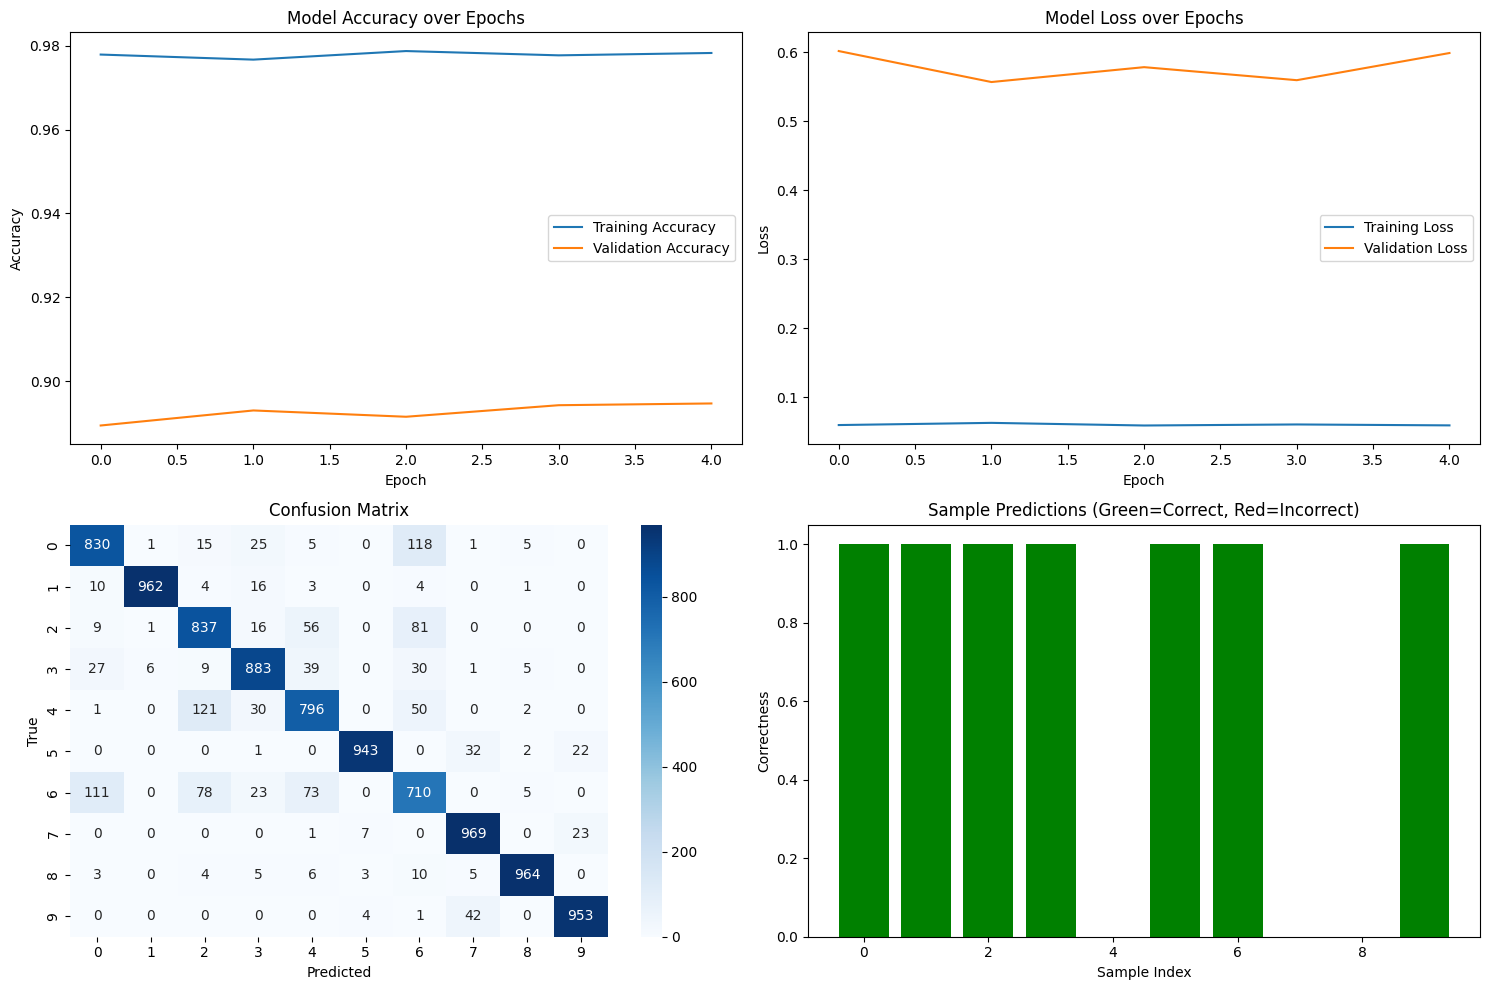


Classification Report:
              precision    recall  f1-score   support

 T-shirt/top       0.84      0.83      0.83      1000
     Trouser       0.99      0.96      0.98      1000
    Pullover       0.78      0.84      0.81      1000
       Dress       0.88      0.88      0.88      1000
        Coat       0.81      0.80      0.80      1000
      Sandal       0.99      0.94      0.96      1000
       Shirt       0.71      0.71      0.71      1000
     Sneaker       0.92      0.97      0.95      1000
         Bag       0.98      0.96      0.97      1000
  Ankle boot       0.95      0.95      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.89      0.88      0.89     10000
weighted avg       0.89      0.88      0.89     10000


Test Loss: 0.6599
Test Accuracy: 0.8847


In [26]:
#使用測試的圖片和label取得評估值
#test_loss:float
#test_accuracy:float
test_loss, test_accuracy = model.evaluate(test_images, test_labels)

# Get predictions
predictions:np.ndarray = model.predict(test_images)
#predictions.shape -> (10000,10)
#np.argmax()用來返回指定軸上最大值的索引。
predicted_labels:np.ndarray = np.argmax(predictions, axis=1)
#predicted_labels.shape -> (10000,)

# # Plot training history
#validation_splite=0.2,這個參數指定了訓練數據中有多少比例將被用作驗證數據。在這裡，20% 的訓練數據將被用來驗證模型的性能。
#verbose=1,這個參數控制訓練過程中輸出的詳細程度。verbose=1 會顯示進度條和每個 epoch 的訓練結果。
#訓練過程中也可以驗証
history = model.fit(training_images, training_labels, epochs=5, 
                    validation_split=0.2, verbose=1)
#print(help(history))
print(history.params)
print(history.history.keys())

# Create a figure with subplots
plt.figure(figsize=(15, 10))

# Plot training & validation accuracy
plt.subplot(2, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

#Plot training & validation loss
plt.subplot(2, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Create confusion matrix
plt.subplot(2, 2, 3)
#scikit-learn提供的confusion_matrix,用於計算分類模型的混淆矩陣,產生的結果適合使用熱區圖顯示,
#confusion_matrix()和heatmap()的結合可以了解每個類型分類的效能
cm = confusion_matrix(test_labels, predicted_labels)

#fmt = '.2f'  # 顯示小數點後兩位
#fmt = '.0f'  # 顯示整數
#fmt = '.3g'  # 使用通用格式，最多3位有效數字
#fmt = 'd'    # 只顯示整數部分
#cmap -> matplotlib colormap name

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

# Plot sample predictions
plt.subplot(2, 2, 4)
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Display some sample predictions
n_samples = 10
sample_indices = np.random.randint(0, len(test_images), n_samples)
sample_images = test_images[sample_indices]
sample_labels = test_labels[sample_indices]
sample_predictions = np.argmax(model.predict(sample_images), axis=1)

# Create bar plot for sample predictions
correct_predictions = sample_predictions == sample_labels
plt.bar(range(n_samples), correct_predictions.astype(int), 
         color=['green' if correct else 'red' for correct in correct_predictions])
plt.title('Sample Predictions (Green=Correct, Red=Incorrect)')
plt.xlabel('Sample Index')
plt.ylabel('Correctness')

plt.tight_layout()
plt.show()

# Print classification report
print("\nClassification Report:")
print(classification_report(test_labels, predicted_labels, 
                           target_names=class_names))

# Print overall test metrics
print(f"\nTest Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
